In [1]:
from typing import Dict

import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

from specpol.ritz import sturm_liouville_bdd, sturm_liouville_halfline
from specpol.plot import plot_ritz

In [2]:
from matplotlib import colormaps
def plot(ritz_results: Dict[int, np.array], dbm=None):
    # plot the approximation with some added bars and lines
    if dbm is not None:
        specs = {
            key: np.array([v for v in ritz_results[key] if v.imag > dbm]) for key in ritz_results
        }
    else:
        specs = ritz_results

    viridis = colormaps["viridis"].resampled(len(specs))

    fig = plt.figure(dpi=1200)

    ax1 = fig.add_subplot()
    ax1.set_prop_cycle(color=viridis.colors)

    for i in specs:
        ax1.scatter([i] * len(specs[i]), specs[i].real, s=8)

    ax1.set_xlabel("size of Ritz matrix (number of rows/columns)")
    ax1.set_ylabel("real part of eigenvalues of the Ritz matrix")

    ax1.set_ylim(-0.1, 0)
    ax1.axhline(-1/16, linestyle="--", alpha=0.6)
    ax1.axhline(-1/36, linestyle="--", alpha=0.6)
    ax1.axhline(-1/64, linestyle="--", alpha=0.6)
    ax1.axhline(-1/100, linestyle="--", alpha=0.6)
    ax1.axhline(-1/144, linestyle="--", alpha=0.6)
    ax1.axhline(-1/196, linestyle="--", alpha=0.6)

    plt.show()

In [3]:
def potential(x):  # the potential Q(x) of the Sturm-Liouville operator
    if x == 0:
        return potential(x+0.01)
    return -1/x + 2/(x**2)

In [7]:
rusl = {}
vc = {}
for i in tqdm(range(50, 75, 25)):
    rusl[i] = sturm_liouville_halfline(potential, i, 250, np.pi/2)

100%|██████████| 1/1 [00:07<00:00,  7.26s/it]


In [ ]:
del rusl[275]
plot(rusl)

In [9]:
np.set_printoptions(threshold=np.inf)
print([(i, rusl[50][i]) for i in range(50) if rusl[50][i] < 0])

[(29, (-0.06250003411169663+0j)), (35, (-0.027777789764748494+0j)), (41, (-0.015625126723569374+0j)), (43, (-0.010074302322321727+0j)), (45, (-0.007306583835411592+0j)), (47, (-0.004483238172698066+0j)), (49, (-0.0020208948259648335+0j))]


In [22]:
rusl[50][35]

(-0.027778161882900686+0j)

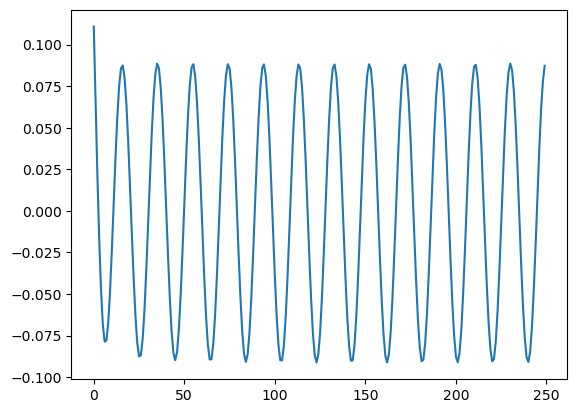

In [30]:
plt.plot(vc[250][:,25])

In [11]:
[1/(2*k+4)**2 for k in range(0, 6)]

[0.0625,
 0.027777777777777776,
 0.015625,
 0.01,
 0.006944444444444444,
 0.00510204081632653]

In [13]:
14**2

196

In [14]:
1/196

0.00510204081632653